# Lake model

see also [this general introduction to the workbench](https://waterprogramming.wordpress.com/2017/11/01/using-the-exploratory-modelling-workbench/) as a source of inspiration for completing the assignment below

## the lake model
The exploratory modeling workbench includes an example folder. This folder contains a variety of examples that demonstrate the functionality of the workbench. Many of these examples have been drawn from published cases. Here, we use the Lake Problem as an example for demonstrating some of the key functionality of the workbench. 

We demonstrate some of the key capabilities of the exploratory modeling workbench using the Lake problem. The lake problem is a stylized and hypothetical decision problem where the population of a city has to decide on the amount of annual pollution it will put into a lake. It the pollution in the lake passes a threshold, it will suffer irreversible eutrophication. 

\begin{equation}
    X_{(t+1)}=X_t+a_t+\frac{(X_t^q)}{(1+X_t^q )}- bX_t+\epsilon_t
\end{equation}

where $X_t$ is the pollution at time $t$, $a_t$ is the rate of anthropogenic pollution at time $t$, $b$ is the lake’s natural removal rate, $q$ is the lake's natural recycling rate, $\epsilon_t$ is the rate of natural pollution at time $t$. The rate of anthropogenic pollution $a_t$ is the decision variable and is somewhere between 0, and 0.1. So $a_t \in [0,0.1]$. The natural pollution $\epsilon_t$ is modeled, following Singh et al. (2015), as a log normal distribution with mean $\mu$ and standard deviation $\sigma$. 
There are four outcomes of interest. The first is the average concentration of phosphor in the lake. 

\begin{equation}
    f_{phosphorus}=  \frac{1}{\left\vert{T}\right\vert} \sum\limits_{t\in{T}} X_t 
\end{equation}

where $\left\vert{T}\right\vert$ is the cardinality of the set of points in time. 
The second objective is the economic benefit derived from polluting the lake. Following Singh et al. (2015), this is defined as the discounted benefit of pollution mines the costs of having a polluted lake

\begin{equation}
    f_{economic} = \sum\limits_{t \in {T}}\alpha a_t \delta^t 
\end{equation}

where $\alpha$ is the utility derived from polluting and $\delta$ is the discount rate. By default, $\alpha$ is 0.04.
The third objective is related to the year over year change in the anthropogenic pollution rate. 

\begin{equation}
    f_{inertia} =\frac{1}{\left\vert{T}\right\vert-1} \sum\limits_{t=1}^{\left\vert{T}\right\vert} I(|a_{t}-a_{t-1} |>\tau)   
\end{equation}

where $I$ is an indicator function that is 0 if the statement is false, and 1 if the statement is true, $\tau$ is the threshold that is deemed undesirable, and is for illustrative purposes et to 0.2. Effectively, f_{inertia} is the fraction of years where the absolute value of the change in anthropogenic pollution is larger then $\tau$.
The fourth objective is the fraction of years where the pollution in the lake is below the critical threshold.

\begin{equation}
    f_{reliability} =  \frac{1}{\left\vert{T}\right\vert} \sum\limits_{t \in T}I(X_{t}<X_{crit} ) 
\end{equation}

where $I$ is an indicator function that is 0 if the statement is false, and 1 if the statement is true, $X_{crit}$ is the critical threshold of pollution and is a function of both $b$ and $q$.

The lake problem is characterized by both stochastic uncertainty and deep uncertainty. The stochastic uncertainty arises from the natural inflow. To reduce this stochastic uncertainty, multiple replications are performed and the average over the replication is taken. Deep uncertainty is presented by uncertainty about the mean $\mu$ and standard deviation $sigma$ of the lognormal distribution characterizing the natural inflow, the natural removal rate of the lake $\beta$, the natural recycling rate of the lake $q$, and the discount rate $\delta$. The table below specifies the ranges for the deeply uncertain factors, as well as their best estimate or default values. 


## Assignment
1. Given the Python implementation of the lake problem in lakemodel_function.py, adapt this code and connect it to the workbench

for the uncertainties, use the following table

|Parameter	|Range	        |Default value|
|-----------|--------------:|------------:|
|$\mu$    	|0.01 – 0.05	|0.02         |
|$\sigma$	|0.001 – 0.005 	|0.0017       |
|$b$      	|0.1 – 0.45	    |0.42         |
|$q$	    |2 – 4.5	    |2            |
|$\delta$	|0.93 – 0.99	|0.98         |

For now, assume that for each year a release decision is made. The release is between 0 and 0.1. Carefully look at line 23 in lake_model.py to identify the name to use for each lever.




In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import importlib
import os
# os.system("lakemodel_function.py")
from lakemodel_function import lake_problem
from ema_workbench import Model, RealParameter, TimeSeriesOutcome, ArrayOutcome, ScalarOutcome, SequentialEvaluator
from ema_workbench.analysis import pairs_plotting, prim
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments)
ema_logging.log_to_stderr(ema_logging.INFO)
import pandas as pd
import ipyparallel as ipp
import time
from ema_workbench import IpyparallelEvaluator, MultiprocessingEvaluator

In [2]:
from lakemodel_function import lake_problem
from ema_workbench import Model, RealParameter, TimeSeriesOutcome, ScalarOutcome

model = Model('lakeproblem', function=lake_problem)

model.uncertainties = [RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2, 4.5),
                       RealParameter('mean', 0.01, 0.05),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('delta', 0.93, 0.99)]

decs= ['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10', 'l11', 'l12', 'l13',
       'l14', 'l15', 'l16', 'l17', 'l18', 'l19', 'l20', 'l21', 'l22', 'l23', 'l24', 'l25',
       'l26', 'l27', 'l28', 'l29', 'l30', 'l31', 'l32', 'l33', 'l34', 'l35', 'l36', 'l37',
       'l38', 'l39', 'l40', 'l41', 'l42', 'l43', 'l44', 'l45', 'l46', 'l47', 'l48', 'l49',
       'l50', 'l51', 'l52', 'l53', 'l54', 'l55', 'l56', 'l57', 'l58', 'l59', 'l60', 'l61',
       'l62', 'l63', 'l64', 'l65', 'l66', 'l67', 'l68','l69', 'l70', 'l71', 'l72', 'l73',
       'l74', 'l75', 'l76', 'l77', 'l78', 'l79', 'l80', 'l81', 'l82', 'l83', 'l84', 'l85',
       'l86', 'l87', 'l88', 'l89', 'l90', 'l91', 'l92', 'l93', 'l94', 'l95', 'l96', 'l97',
       'l98', 'l99']
ml=[]
for i in decs:
    ml.append(RealParameter(str(i),0,0.1))
model.levers=ml

#max_P, utility, inertia, reliability
model.outcomes = [ScalarOutcome('max_P'),
                  ScalarOutcome('utility'),
                  ScalarOutcome('inertia'),
                  ScalarOutcome('reliability')]


2. Explore the behavior of the system in the absence of any release using 1000 scenarios, and the default sampling approach.
    * visualize the outcomes of interest, are there any apparent trade-offs?
    * can you visually identify the uncertainties that drive system behavior?

In [31]:
from ema_workbench import SequentialEvaluator

with SequentialEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000)

[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished


Checking the format of the experiments and the outcomes of interest

In [32]:
experiments, outcomes = results
print(experiments.shape)
print(list(outcomes.keys()))

(1000, 8)
['max_P', 'utility', 'inertia', 'reliability']


#### Visulization of the outcomes of interest with a pairplot

[MainProcess/INFO] no time dimension found in results


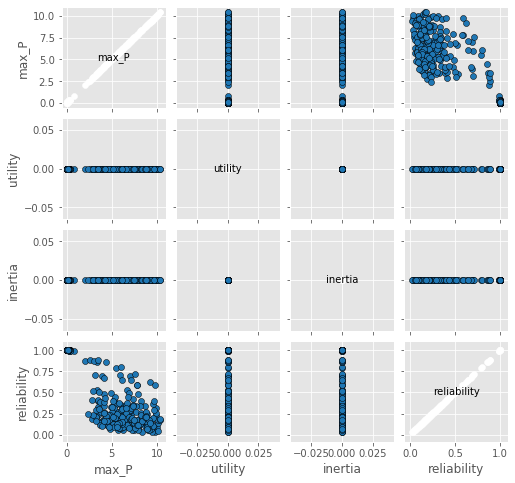

In [34]:
#visualize the outcomes of interest 
from ema_workbench.analysis import pairs_plotting
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=False)
fig.set_size_inches(8,8)
import matplotlib.pyplot as plt
plt.show()

The plot shows that without any policy in place only the outcomes max_P and reliability have an effect on each other. If the reliability increases, max_P decreases. Thus, we need to take a look at both of the outcomes and find out which uncertainties have an effect on them.

In [39]:
Inertia_outcome = outcomes['inertia']
max_P_outcome = outcomes['max_P']
utility_outcome = outcomes['utility']
Reliability_outcome = outcomes['reliability']

#### Visualization of Max_P and its relationship to the uncertainties b, delta, stdev, q, and mean

Scatterplots is created to explore the relationships

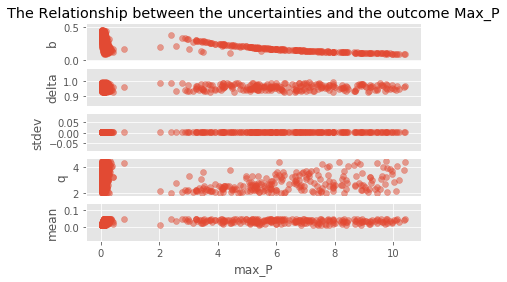

In [52]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

ax1 = plt.subplot(5,1,1)
plt.title('The Relationship between the uncertainties and the outcome Max_P')
plt.scatter( max_P_outcome,experiments.b, alpha=0.5)
plt.ylabel('b')
plt.gca().axes.get_xaxis().set_visible(False)

ax2 = plt.subplot(5,1,2)
plt.scatter(max_P_outcome, experiments.delta, alpha=0.5)
plt.ylabel('delta')
plt.gca().axes.get_xaxis().set_visible(False)

ax3 = plt.subplot(5,1,3)
plt.scatter(max_P_outcome, experiments.stdev, alpha=0.5)
plt.ylabel('stdev')
plt.gca().axes.get_xaxis().set_visible(False)

ax4 = plt.subplot(5,1,4)
plt.scatter(max_P_outcome, experiments.q, alpha=0.5)
plt.ylabel('q')
plt.gca().axes.get_xaxis().set_visible(False)

ax5 = plt.subplot(5,1,5)
plt.scatter(max_P_outcome, experiments['mean'], alpha=0.5)
plt.xlabel('max_P')
plt.ylabel('mean')

plt.show()

The plots above show the relationship between the uncertainties and the outcome max_P. The following points can be observed.
- b and max_P: As max_P increases the range of b is decreasing. With a small max_P the range of values of b is at its maximum and then decreases as the value of max_P increases.
- for delta, mean, and stdev and max_P: There are no experiments outcomes with max_P in the range of roughly 1 and 2. There is a higher density at max_P equals to zero and then it is evenly spread out between max_P equals and roughly 10.
- As max_P and q are increasing the range of possible outcomes increases.

#### Visualization of Reliability and its relationship to the uncertainties b, delta, stdev, q, and mean

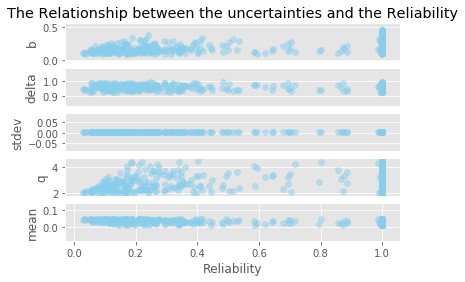

In [56]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

ax1 = plt.subplot(5,1,1)
plt.title('The Relationship between the uncertainties and the Reliability')
plt.scatter( Reliability_outcome, experiments.b , alpha=0.5, color = 'skyblue')
plt.ylabel('b')
plt.gca().axes.get_xaxis().set_visible(False)

ax2 = plt.subplot(5,1,2)
plt.scatter(Reliability_outcome , experiments.delta, alpha=0.5, color = 'skyblue')
plt.ylabel('delta')
plt.gca().axes.get_xaxis().set_visible(False)

ax4 = plt.subplot(5,1,3)
plt.scatter(Reliability_outcome , experiments.stdev, alpha=0.5, color = 'skyblue')
plt.ylabel('stdev')
plt.gca().axes.get_xaxis().set_visible(False)

ax5 = plt.subplot(5,1,4)
plt.scatter(Reliability_outcome , experiments.q, alpha=0.5, color = 'skyblue')
plt.ylabel('q')
plt.gca().axes.get_xaxis().set_visible(False)

ax5 = plt.subplot(5,1,5)
plt.scatter(Reliability_outcome , experiments['mean'], alpha=0.5, color = 'skyblue')
plt.xlabel('Reliability')
plt.ylabel('mean')

plt.show()

The plots above show the relationship between the uncertainties and the outcome reliability. The following points can be observed.
- a higher denisty of points can be observed with a lower reliability and a high reliability. A reliability between 0.6 and 0.9 seems less likely for all uncertainties.
- as the reliability increases, the range of values for q increases. The same observation can be made for b and the outcome reliability. That means that if the reliability increases, the uncertainty in the values b and q increases.
- For the uncertainties mean and delta the range in their values seems to stay stable with an increasing reliability.